In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
import numpy as np

x = np.array([[18],[23],[28],[33],[38],[43],[48],[53],[58],[63]])
y = np.array([[871],[1132],[1042],[1356],[1488],[1638],[1569],[1754],[1866],[1900]])


In [3]:
from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
x = scaler_x.fit_transform(x)

In [4]:
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

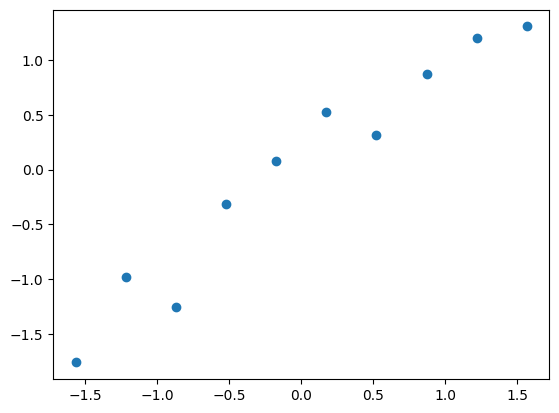

In [5]:
import matplotlib.pyplot as plt
plt.scatter(x,y)

#formula regressão linear simples


In [8]:
np.random.seed(0)
np.random.rand(2)

array([0.5488135 , 0.71518937])

In [9]:
b0 = tf.Variable(0.54)
b1 = tf.Variable(0.71)

In [10]:
error = tf.losses.mean_squared_error(y, (b0 + b1 * x))
otmizador = tf.train.GradientDescentOptimizer(learning_rate = 0.001)
treinamento = otmizador.minimize(error)

In [11]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(1000):
        sess.run(treinamento)
    b0_final, b1_final = sess.run([b0, b1])

2025-01-29 15:28:20.193877: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
I0000 00:00:1738175300.198248    7699 mlir_graph_optimization_pass.cc:401] MLIR V1 optimization pass is not enabled


In [12]:
b0_final, b1_final

(np.float32(0.07293496), np.float32(0.9359134))

In [13]:
previsoes = b0_final + b1_final * x

In [14]:
previsoes

array([[-1.39335951],
       [-1.06751629],
       [-0.74167308],
       [-0.41582986],
       [-0.08998665],
       [ 0.23585657],
       [ 0.56169979],
       [ 0.887543  ],
       [ 1.21338622],
       [ 1.53922944]])

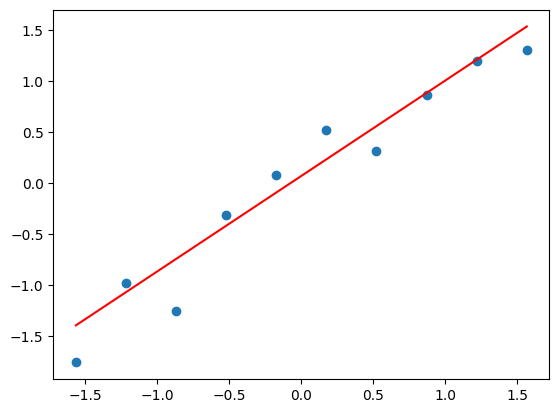

In [16]:
plt.plot(x, y, 'o')
plt.plot(x, previsoes, color = 'red')